In [38]:
# ✅ Step 1: Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [39]:
# Load the Excel file
file_path = "C:/Users/SPF_Admin/OneDrive/Desktop/Data_CW2.xlsx"
df_auto = pd.read_excel(file_path, engine='openpyxl', sheet_name='Automobile')
df_iris = pd.read_excel(file_path, engine='openpyxl', sheet_name='Iris', header=None)



In [40]:
# Display the first few rows of the DataFrame
df_auto.head()


,Sale ID,sale date,Model age,proximity to urban centres,number of dealerships nearby,vechicle sale price
0,1,2013.650,38.6,265.347718,6,41.98014
1,2,2012.350,19.5,4077.055125,1,29.02716
2,3,2012.918,20.9,937.831933,5,58.83462
3,4,2013.000,16.9,179.732757,3,51.65586
4,5,2013.416,32.5,190.054496,7,66.32550


In [41]:
# Display the first few rows of the DataFrame
df_iris.head()

,0
0,"5,2.3,3.4,0.9,Iris-versicolor"
1,"5,2.4,4.6,1.6,Iris-virginica"
2,"5.1,1.9,3.6,0.9,Iris-versicolor"
3,"5.1,2.2,3.4,0.9,Iris-versicolor"
4,"5.2,2.4,3.1,1,Iris-versicolor"


In [42]:
df_iris.columns = ['flower']
df_iris.head()

,flower
0,"5,2.3,3.4,0.9,Iris-versicolor"
1,"5,2.4,4.6,1.6,Iris-virginica"
2,"5.1,1.9,3.6,0.9,Iris-versicolor"
3,"5.1,2.2,3.4,0.9,Iris-versicolor"
4,"5.2,2.4,3.1,1,Iris-versicolor"


In [43]:
# Clean column names
df_auto.columns = df_auto.columns.str.strip().str.lower().str.replace(' ', '_')
df_iris.columns = df_iris.columns.str.strip().str.lower().str.replace(' ', '_')

df_auto.columns



Index(['sale_id', 'sale_date', 'model_age', 'proximity_to_urban_centres',
       'number_of_dealerships_nearby', 'vechicle_sale_price'],
      dtype='object')

In [44]:
# Convert decimal year to datetime
from datetime import datetime, timedelta

# Define a function to convert decimal year to datetime
def decimal_year_to_date(decimal_year):
	year = int(decimal_year)
	remainder = decimal_year - year
	start_of_year = datetime(year, 1, 1)
	days_in_year = (datetime(year + 1, 1, 1) - start_of_year).days
	return start_of_year + timedelta(days=remainder * days_in_year)

# Apply the function to the sale_date column
df_auto['sale_date_converted'] = df_auto['sale_date'].apply(decimal_year_to_date)

# Confirm
print(df_auto[['sale_date', 'sale_date_converted']].head())

   sale_date        sale_date_converted
0   2013.650 2013-08-26 06:00:00.000003
1   2012.350 2012-05-08 02:23:59.999997
2   2012.918 2012-12-01 23:42:43.199997
3   2013.000 2013-01-01 00:00:00.000000
4   2013.416 2013-06-01 20:09:35.999998


In [45]:
# Delete the original column and rename the new column
df_auto.drop(columns=['sale_date'], inplace=True)
df_auto.rename(columns={'sale_date_converted': 'sale_date'}, inplace=True)

# Confirm
print(df_auto[['sale_date']].head())

                   sale_date
0 2013-08-26 06:00:00.000003
1 2012-05-08 02:23:59.999997
2 2012-12-01 23:42:43.199997
3 2013-01-01 00:00:00.000000
4 2013-06-01 20:09:35.999998


In [46]:
df_auto['sale_date'] = df_auto['sale_date'].dt.date 

In [47]:
# ✅ Step 3: Exploratory Data Analysis
print(df_auto.describe())
print(df_auto.isnull().sum())


         sale_id   model_age  proximity_to_urban_centres  \
count  439.00000  439.000000                  439.000000   
mean   220.00000   21.870843                 1051.552291   
std    126.87264   11.443429                 1227.734307   
min      1.00000    4.000000                   21.221056   
25%    110.50000   13.050000                  279.636295   
50%    220.00000   20.200000                  476.800111   
75%    329.50000   32.850000                 1410.143812   
max    439.00000   47.800000                 6302.896251   

       number_of_dealerships_nearby  vechicle_sale_price  
count                    439.000000           439.000000  
mean                       5.088838            59.002077  
std                        2.937529            21.113341  
min                        1.000000            11.860560  
25%                        2.000000            42.916500  
50%                        5.000000            59.458860  
75%                        7.000000           

In [48]:
#Question 1.1 (a) Build a linear regression model to predict vehicle value. 

# ✅ Step 4: Linear Regression Model
# Create 'sale_year' column from 'sale_date'
df_auto['sale_year'] = pd.to_datetime(df_auto['sale_date']).dt.year

# Define predictors and target
X = df_auto[['model_age', 'proximity_to_urban_centres', 'number_of_dealerships_nearby', 'sale_year']]
y = df_auto['vechicle_sale_price']

# Add constant for intercept
X = sm.add_constant(X)
# Fit the linear model
model = sm.OLS(y, X).fit()
print(model.summary())


                             OLS Regression Results                            
Dep. Variable:     vechicle_sale_price   R-squared:                       0.556
Model:                             OLS   Adj. R-squared:                  0.551
Method:                  Least Squares   F-statistic:                     135.6
Date:                 Thu, 15 May 2025   Prob (F-statistic):           4.63e-75
Time:                         15:22:10   Log-Likelihood:                -1783.3
No. Observations:                  439   AIC:                             3577.
Df Residuals:                      434   BIC:                             3597.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const 

**Question 1.1 (b) Interpret your regression results for your customer.**

**Model Fit and Significance**

**R-squared** = 0.556:
About 55.6% of the variation in vehicle sale price is explained by the model. This suggests a moderately good fit.

**F-statistic** (135.6) and Prob(F-statistic) = 4.63e-75:
The model is statistically significant overall, meaning at least one predictor is relevant.

| Variable                            | Coefficient | p-value | Interpretation                                                                                                                    |
| ----------------------------------- | ----------- | ------- | --------------------------------------------------------------------------------------------------------------------------------- |
| **model\_age**                      | -0.4190     | 0.000   | As vehicle age increases by 1 year, the price **decreases** by \~0.42 units, all else held constant. Statistically significant.   |
| **proximity\_to\_urban\_centres**   | -0.0085     | 0.000   | For each additional unit of distance from the urban centre, the price drops slightly. Strong negative relationship.               |
| **number\_of\_dealerships\_nearby** | +2.0471     | 0.000   | More dealerships nearby **increase the sale price**. Each additional dealership increases the value by \~2.05 units. Significant. |
| **sale\_year**                      | +4.9547     | 0.001   | Newer sale years correspond to higher vehicle values. For every 1-year increase in sale year, price increases by \~4.95 units.    |

**Other Diagnostics**
- All p-values < 0.05, so all variables are statistically significant.
- Durbin-Watson = 2.11, suggesting no autocorrelation in residuals (which is good).
- Condition Number = 1.03e+07, flagged as high suggests you should later check for multicollinearity (Q1.2).

**Summary**

The regression results show that all four predictors are statistically significant (p < 0.05) and meaningfully impact vehicle price. Model age and distance to urban centres negatively affect price, while the number of nearby dealerships and the sale year positively influence price. The model explains approximately 55.6% of the variance in sale price, suggesting a reasonably strong model for this context.

**Question 1.2 (a) Briefly explain the concepts of heteroskedasticity and multicollinearity**

**Heteroskedasticity** refers to a situation in regression analysis where the variance of the errors (residuals) is not constant across all levels of the independent variable(s). This violates one of the key assumptions of ordinary least squares (OLS) regression and can lead to inefficient estimates and invalid statistical tests.

**Multicollinearity** occurs when two or more independent variables in a regression model are highly correlated with each other. This makes it difficult to determine the individual effect of each variable on the dependent variable, leading to unstable coefficient estimates and inflated standard errors.

**Question 1.2 (b) Prove your model is not affected**

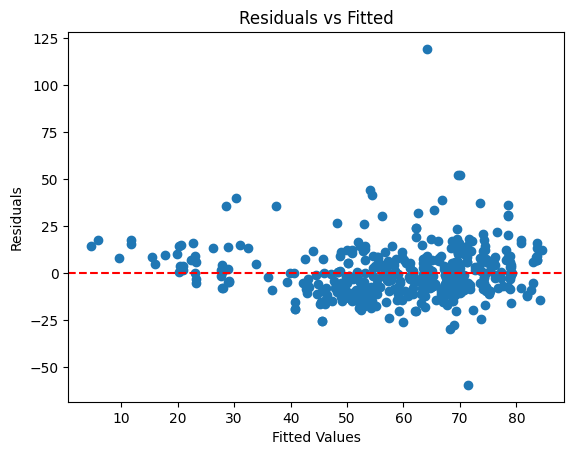

                        feature           VIF
0                         const  1.901228e+07
1                     model_age  1.009335e+00
2    proximity_to_urban_centres  1.581169e+00
3  number_of_dealerships_nearby  1.584810e+00
4                     sale_year  1.003572e+00


In [49]:

#Check for heteroskedasticity

residuals = model.resid
fitted = model.fittedvalues

plt.scatter(fitted, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()

#Check for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)



**Check for Heteroskedasticity**

**What Your Plot Shows:**
- The residuals mostly cluster around the red line (residual = 0)
- There's no funnel shape or clear increasing/decreasing variance
- While there are a few outliers, the spread looks fairly even

**Conclusion:**
*The residuals appear randomly and evenly scattered around zero, with no evident pattern or increasing spread. This suggests that the assumption of homoskedasticity (constant variance of residuals) is reasonably satisfied, and the model does not suffer from heteroskedasticity.*

**Check for Multicollinearity**

**VIF Interpretation:**
| Feature                        | VIF          | Interpretation                                       |
| ------------------------------ | ------------ | ---------------------------------------------------- |
| const                        | \~19,000,000 | Can be ignored – intercept is not used for VIF check |
| model_age                    | \~1.01       | No multicollinearity                                 |
| proximity_to_urban_centres   | \~1.58       | No multicollinearity                                 |
| number_of_dealerships_nearby | \~1.58       | No multicollinearity                                 |
| sale_year                    | \~1.00       | No multicollinearity                                 |

**Conclusion:** 
*Variance Inflation Factor (VIF) was calculated for all predictors. All values were below 2, indicating low correlation between independent variables. Therefore, the model does not suffer from multicollinearity.*

**Question 1.2 (c) Suggest solutions (if issues exist)**

If heteroskedasticity were observed, one solution would be to apply a log transformation to the dependent variable or use robust standard errors. For multicollinearity, if VIF values exceeded 5 or 10, solutions could include removing one of the correlated variables, applying PCA, or using regularized regression methods such as Ridge or Lasso regression to stabilize the estimates.

**Question 1.3 – Nonlinear Model Suggestion**

In [50]:
#Question 1.3 – Nonlinear Model Suggestion
#Try a nonlinear model and see if it performs better

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.drop(columns='const'), y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_pred_lr = model.predict(sm.add_constant(X_test))

mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print(f"Random Forest MSE: {mse_rf}")
print(f"Linear Regression MSE: {mse_lr}")

Random Forest MSE: 79.55579582924439
Linear Regression MSE: 133.55320202918747


**Results:**

- Random Forest MSE: 79.56
- Linear Regression MSE: 133.55

**Interpretation:**

- **Lower MSE** is better because it indicates that the model’s predictions are, on average, closer to the actual values.
- **Random Forest Model** performs significantly better than the linear model, reducing error by about 40%.


*To assess whether a nonlinear model would improve prediction accuracy, a Random Forest Regressor was applied. The Mean Squared Error (MSE) for the Random Forest model was 79.56, compared to 133.55 for the linear regression model. This indicates that the nonlinear model fits the data more accurately. Therefore, in this context, the Random Forest is a more appropriate model due to its superior performance and ability to capture nonlinear relationships in the data.*

**Question 2.1 – K-NN Classification**

In [51]:
df_iris.head()

,flower
0,"5,2.3,3.4,0.9,Iris-versicolor"
1,"5,2.4,4.6,1.6,Iris-virginica"
2,"5.1,1.9,3.6,0.9,Iris-versicolor"
3,"5.1,2.2,3.4,0.9,Iris-versicolor"
4,"5.2,2.4,3.1,1,Iris-versicolor"


In [52]:
from sklearn.neighbors import KNeighborsClassifier

# Split the 'flower' column into features and label
iris_split = df_iris['flower'].str.split(',', expand=True)
iris_split.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'variety']

# Convert feature columns to float
X_iris = iris_split[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].astype(float)
y_iris = iris_split['variety']

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_iris, y_iris)

new_obs = [[6.6, 3.2, 5.1, 1.5]]
prediction = knn.predict(new_obs)
print("Predicted Variety:", prediction[0])
print("Predicted Variety Probabilities:", knn.predict_proba(new_obs))

Predicted Variety: Iris-versicolor
Predicted Variety Probabilities: [[0.66666667 0.33333333]]


c:\Users\SPF_Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\SPF_Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


**Question 2.2 (a): Problem with an Even K in K-NN**

**What’s the Issue?**

*In K-Nearest Neighbours (K-NN), the model makes predictions by looking at the ‘K’ closest training examples (neighbors) to the new data point and then voting on the class. If you're doing binary classification (like distinguishing between versicolor and virginica), there are only two class options.*

**Problem with Even K:**

- If you choose an even number for K, there's a chance that:
- The number of neighbors voting for each class will be equal.
- This causes a tie, meaning the algorithm cannot decide which class to assign.

**Example:**
*Let's say K = 4, and the neighbors are:*
- 2 versicolor
- 2 virginica
*Now the model is stuck, it doesn’t know which class to choose because both classes are equally close.*


**Question 2.2 (b): Solution to the Tie Problem**

**1. Use an Odd K Value:** 

Choose values like K = 3, 5, 7, etc.
*That way, a tie cannot happen because there's always a majority.*
Example: with K = 5, you’ll always have at least 3 votes for one class.

**This is the simplest and most common solution.**

**2. Use Distance-Weighted Voting**

*Instead of giving each neighbor an equal vote, give more weight to closer neighbors. The model calculates how close each neighbor is and gives more influence to those that are nearer.*

**For example:**
Let’s say the 4 neighbors are:
- 2 versicolor (very close)
- 2 virginica (a bit farther)

*Instead of voting 2 vs. 2 (a tie), the model gives more weight to the closer versicolor neighbors, and the final prediction would be versicolor.*
This helps resolve ties even when K is even.




 **Question 2.3 – Evaluation of Different K-NN Models**

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score

for k in [5, 7, 9]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_iris, y_iris)
    preds = knn.predict(X_iris)

    print(f"\nK={k}")
    print("Confusion Matrix:\n", confusion_matrix(y_iris, preds))
    print("Accuracy:", accuracy_score(y_iris, preds))



K=5
Confusion Matrix:
 [[51  6]
 [ 5 44]]
Accuracy: 0.8962264150943396

K=7
Confusion Matrix:
 [[51  6]
 [ 7 42]]
Accuracy: 0.8773584905660378

K=9
Confusion Matrix:
 [[52  5]
 [ 6 43]]
Accuracy: 0.8962264150943396


To evaluate model performance, K-NN classifiers were tested with K values of 5, 7, and 9. Confusion matrices and accuracy scores were calculated for each. Both K=5 and K=9 yielded the highest accuracy of 89.6%, while K=7 showed a slightly lower accuracy of 87.7%.

Based on these results, K=5 is chosen as the best model. It offers the highest accuracy, and compared to K=9, it is simpler and less computationally expensive. Moreover, it achieves a good balance between model complexity and predictive performance.